In [95]:
source("Main.R")
source("Conf.R")
source("Utilities.R")
source("DAVID_query.R")
library("factoextra")
library("maptree")
library(repr)


In [96]:
proComp <- data.frame(fread("/home/beraslan/jovian-work/analysisSingle/R/allComplexes.txt"), stringsAsFactors = F)
proComp <- proComp[proComp$Organism == "Mouse",]

In [97]:
guideModulesN <- data.frame(read.csv("/home/beraslan/jovian-work/analysisSingle/ME_GuideModules_leiden_6_Modules.csv"),  row.names = 1, stringsAsFactors = F)
guideModulesN$GuideName  <- as.character(guideModulesN$GuideName )
rownames(guideModulesN) <- guideModulesN$GuideName 
guideModulesN$GuideColor <- NULL

In [98]:
unique(guideModulesN$GuideGroup)

[1] 4 0 1 5 3 2

In [99]:
str(guideModulesN)

'data.frame':	329 obs. of  2 variables:
 $ GuideName : chr  "Aamp" "Bop1" "Cirh1a" "Dcaf13" ...
 $ GuideGroup: int  4 4 4 4 4 4 4 4 4 4 ...


In [100]:
ProteinComplexes=list()

for(i in 1:nrow(proComp)){
  ProteinComplexes <- lappend(ProteinComplexes, strsplit(as.character(proComp[i,"subunits.Gene.name."]) , ";")[[1]])
}
names(ProteinComplexes) <- proComp$ComplexName
ProteinComplexes <- ProteinComplexes[!duplicated(names(ProteinComplexes))]


In [101]:
availComplex = sapply(ProteinComplexes, function(x){length(x[(x %in% guideModulesN$GuideName)])})
proCompAvail = ProteinComplexes[which(availComplex > 1)]

In [102]:
uniqueProteinComp = unique(unlist(proCompAvail))

In [103]:
availKOGenes = guideModulesN$GuideName %in% uniqueProteinComp

In [104]:
guideModulesN$GuideName[availKOGenes]

[1] "Grb2"    "Ptpn11"  "Wdr5"    "Ahr"     "Hdac4"   "Ikbkg"   "Kmt2b"  
 [8] "Ube2n"   "Akt1"    "Birc2"   "Chd4"    "Crebbp"  "Ep300"   "Gnb1"   
[15] "Ppp2r2a" "Rbbp4"   "Smad2"   "Traf2"   "Nfkb1"   "Arnt"    "Cbl"    
[22] "Cul1"    "Cul3"    "Cul5"    "Keap1"   "Rbx1"    "Rela"    "Tceb1"  
[29] "Tceb2"   "Trim33"

In [105]:
myResMat = data.frame(matrix(-1, ncol = length(guideModulesN$GuideName[availKOGenes]),nrow = length(proCompAvail)))
colnames(myResMat) = guideModulesN$GuideName[availKOGenes]
rownames(myResMat) = names(proCompAvail)

In [106]:
for(i in 1:nrow(guideModulesN)){
    for(j in 1:length(proCompAvail)){
        proComplex = names(proCompAvail)[j]
        guideName = as.character(guideModulesN[i, "GuideName"])
        
        guideGroup = as.numeric(as.character(guideModulesN[i, "GuideGroup"]))
        
        proCompGenes = proCompAvail[[j]]
        
        
        if(guideName %in% proCompGenes){
            myResMat[proComplex,guideName] = guideGroup
        }
        
    }
}

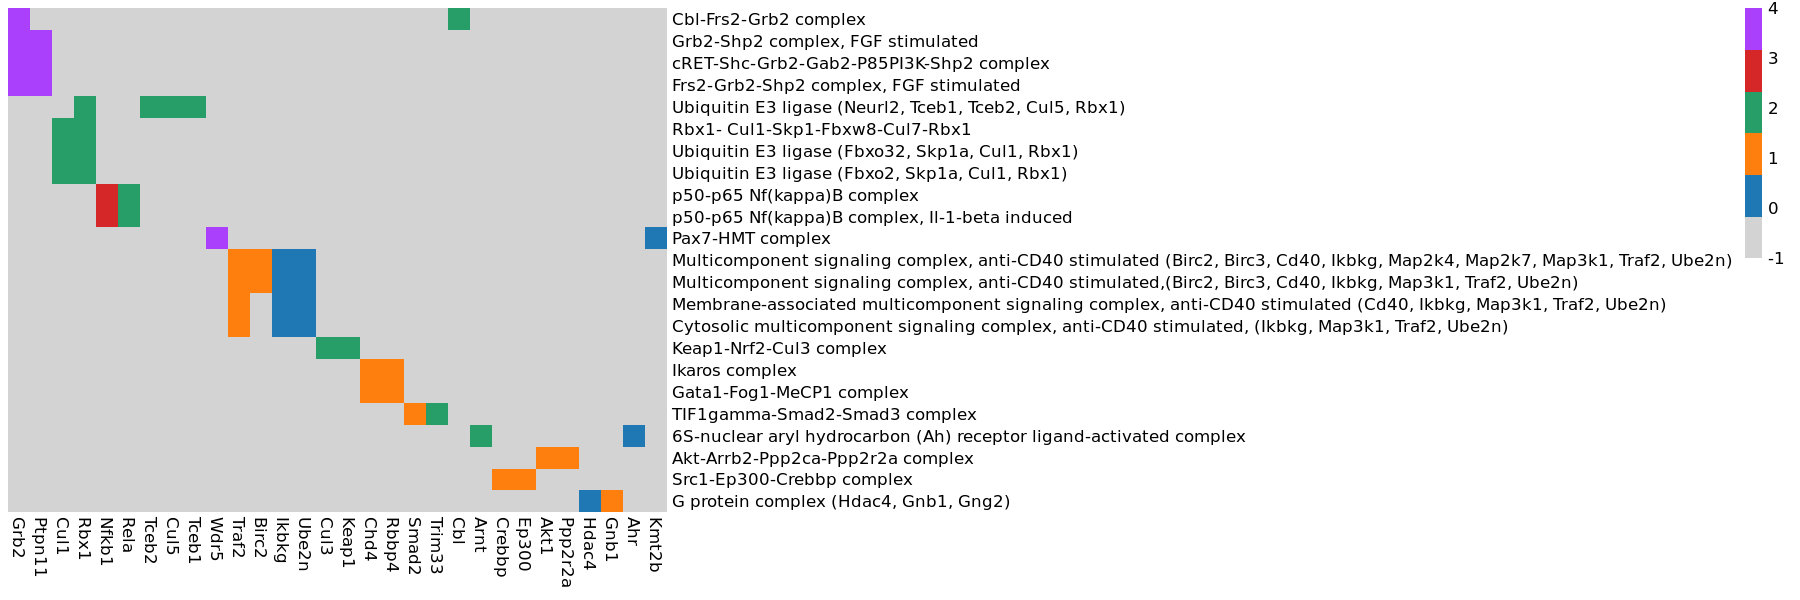

In [111]:
options(repr.plot.width=15, repr.plot.height=5)
pheatmap(myResMat, clustering_method="ward.D2", treeheight_col = 0, treeheight_row = 0, color = c("lightgrey", "#1f77b4", "#ff7f0e", "#279e68", "#d62728", "#aa40fc"))

In [ ]:
KOEffectedGenes[KOEffectedGenes %ni% ProCompGenes]

In [ ]:
length(ProCompGenes[ProCompGenes %ni% KOEffectedGenes])

In [ ]:
unique(c(KOEffectedGenes, ProCompGenes))

In [ ]:
length(universe[universe %ni% unique(c(KOEffectedGenes, ProCompGenes))])